In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

# 1. Data import

There are two main datasets: Test Setup dataset and Test Measurements dataset.

- Test Setup dataset contains all the info about how the test was conducted (Temperature, type of test, date, ...)
- Test Measurements dataset contains the data collected by sensors during the (dis)charging stage.

## Test setup
Falta infos do teste 61403070

In [3]:
df_test_setup_raw = pd.read_excel('../data/test_setup_2013.xlsx')
df_test_setup_raw.head()

,Unnamed: 0,Test ID [#],Cold start (CSt) Hot start [HSt],Date,Test Cell Temp [C],Test Cell RH [%],Test Cell Baro [in/Hg],Vehicle cooling fan speed: Speed Match [SM] or constant speed [CS],Solar Lamps [W/m2],Vehicle Climate Control settings,...,Window Position [Closed] or [Down],Cycle Distance [mi],Cycle Fuel economy [mpg] (Emiss Bag),Cycle HV battery Integrated net current [DC Ah],Cycle HV battery Average Zero crossing Voltage [V],Cycle HV battery Net Energy [DC Wh],Cycle HV battery Net Energy Consumption[DC Wh/mi],Cycle,Order,Charge
0,0.0,61403061,CS,03/13/14,-7.0,7.1,29.4,SM,0.0,72,...,Closed,7.46,-,6.428,383.3,2911.7,390.5,UDDS #1,1,1
1,1.0,61403062,HS,03/13/14,-5.0,7.3,29.4,SM,0.0,72,...,Closed,10.24,-,7.726,376.0,3052.1,297.9,HWY #1,2,1
2,2.0,61403063,HS,03/13/14,-7.0,8.2,29.4,SM,0.0,73,...,Closed,7.47,-,5.711,373.1,2346.3,314.2,UDDS #2,3,1
3,3.0,61403064,HS,03/13/14,-4.0,6.8,29.4,SM,0.0,74,...,Closed,8.02,-,7.979,358.7,2906.3,362.4,US06 #1,4,1
4,4.0,61403065,HS,03/13/14,-4.0,7.2,29.4,SM,0.0,75,...,Closed,8.02,-,7.910,351.9,2856.6,356.0,US06 #2,5,1


In [4]:
df_test_setup_raw['Test ID [#]'] = df_test_setup_raw['Test ID [#]'].astype(str) 

In [5]:
df_test_setup_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 21 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Unnamed: 0                                                          27 non-null     float64
 1   Test ID [#]                                                         36 non-null     object 
 2   Cold start (CSt) Hot start [HSt]                                    33 non-null     object 
 3   Date                                                                33 non-null     object 
 4   Test Cell Temp [C]                                                  33 non-null     float64
 5   Test Cell RH [%]                                                    33 non-null     float64
 6   Test Cell Baro [in/Hg]                                              33 non-null     float64
 7   Vehicle cooling fan

## Test Measurements dataset

There are datasets with info about charging and dischargin tests. 

In [6]:
cols_name = ['Time[sec]', 'Dyno_Speed[mph]', 'Dyno_Tractive_Effort[N]',
       'Test_Cell_Temp[C]', 'Test_Cell_RH[%]', 'Phase_#',
       'HV_Battery_Current[A]', 'HV_Battery_Voltage[V]', 'HV_Battery_SOC[%]',
       'Accelerator_Pedal_Position[%]', 'test_id']

cols_2012 = ['Timestamp [sec]','Dyno Speed [mph]','Dyno Tractive Effort [N]',
             'Cell Temp [C]','Cell RH [%]','Phase #',
             'HV Battery Voltage w/500A max clamp [V]','HV Battery Current w/500A max clamp [A]',
             'HV Battery Voltage w/200A max clamp [V]','HV Battery Current w/200A max clamp [A]',
             'DCDC Outlet Voltage [V]','DCDC Outlet Current [A]','Accelerator Pedal Position [%]',
             'Inverter Cooling Hose Temp [C]','test_id']

In [7]:
data_path = '../data/raw/2013'
raw_files = os.listdir(data_path)
df_discharging_raw = pd.DataFrame()
df_charging_raw = pd.DataFrame()

for idx, filename in enumerate(raw_files):
    filepath = os.path.join(data_path, filename)    
    df = pd.read_csv(filepath, sep='\s+', index_col=False)
    if 'Charge' not in filename:
        test_id = filename.split(' ')[0]
        print(test_id)
        df['test_id'] = test_id
        df_discharging_raw = pd.concat([df_discharging_raw, df])
    else:
        charge_id = filename.split('_')[0]
        print(charge_id)
        df['test_id'] = charge_id
        df_charging_raw = pd.concat([df_charging_raw, df])

61403011
61403012
61403013
61403014
61403015
61403016
61403017
61403018
61403019
61403020
61403020
61403021
61403022
61403023
61403024
61403025
61403026
61403027
61403028
61403029
61403030
61403030
61403061
61403062
61403063
61403064
61403065
61403066
61403067
61403067
61403070
61403072
61403074
61403100
61403102
61403103


In [8]:
df_discharging_raw.head()

,Time[sec],Dyno_Speed[mph],Dyno_Tractive_Effort[N],Test_Cell_Temp[C],Test_Cell_RH[%],Phase_#,HV_Battery_Current[A],HV_Battery_Voltage[V],HV_Battery_SOC[%],Accelerator_Pedal_Position[%],test_id
0,-10.0,0.009,-12.170,22.256,40.693,0.0,-0.043,0.438,0.0,0.0,61403011
1,-9.9,0.010,-12.332,22.256,40.696,0.0,-0.037,0.437,0.0,0.0,61403011
2,-9.8,0.010,-12.272,22.256,40.694,0.0,-0.048,0.435,0.0,0.0,61403011
3,-9.7,0.009,-12.146,22.256,40.694,0.0,-0.052,0.438,0.0,0.0,61403011
4,-9.6,0.010,-12.240,22.255,40.693,0.0,-0.050,0.439,0.0,0.0,61403011


In [9]:
df_discharging_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349145 entries, 0 to 18130
Data columns (total 11 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Time[sec]                      349145 non-null  float64
 1   Dyno_Speed[mph]                349145 non-null  float64
 2   Dyno_Tractive_Effort[N]        349145 non-null  float64
 3   Test_Cell_Temp[C]              349145 non-null  float64
 4   Test_Cell_RH[%]                349145 non-null  float64
 5   Phase_#                        349145 non-null  float64
 6   HV_Battery_Current[A]          349145 non-null  float64
 7   HV_Battery_Voltage[V]          349145 non-null  float64
 8   HV_Battery_SOC[%]              349145 non-null  float64
 9   Accelerator_Pedal_Position[%]  349145 non-null  float64
 10  test_id                        349145 non-null  object 
dtypes: float64(10), object(1)
memory usage: 32.0+ MB


In [10]:
df_charging_raw.head()

,Time[s],Voltage[V]_HV_Power_Distribution_Module_net,Current[A]_HV_Power_Distribution_Module_net,Integrated_Current[Ah]_HV_Power_Distribution_Module_net,Integrated_Power[Wh]_HV_Power_Distribution_Module_net,Voltage[V]_12V_DCDC_Out,Current[A]_12V_DCDC_Out,Integrated_Current[Ah]_12V_DCDC_Out,Integrated_Power[Wh]_12V_DCDC_Out,Voltage[V]_HVAC_Compressor,...,Integrated_Power[Wh]_AC_Charge_Pre_EVSE,Voltage[V]_HVAC_PTC_Heater,Current[A]_HVAC_PTC_Heater,Integrated_Current[Ah]_HVAC_PTC_Heater,Integrated_Power[Wh]_HVAC_PTC_Heater,Voltage[V]_HV_Power_Distribution_Module_net_2,Current[A]_HV_Power_Distribution_Module_net_2,Integrated_Current[Ah]_HV_Power_Distribution_Module_net_2,Integrated_Power[Wh]_HV_Power_Distribution_Module_net_2,test_id
0,36,0.0,0.0,0.0020,0.0,12.595,0.0,0.0010,0.009,0.0,...,0.16,0.00,0.05,0.000,0,-0.03,0.09,0.001,0,61403020
1,41,0.0,0.0,0.0023,0.0,12.596,0.0,0.0012,0.009,0.0,...,0.19,-0.02,0.05,0.001,0,-0.02,0.09,0.001,0,61403020
2,46,0.0,0.0,0.0026,0.0,12.596,0.0,0.0013,0.011,0.0,...,0.21,-0.01,0.05,0.001,0,-0.02,0.09,0.001,0,61403020
3,51,0.0,0.0,0.0029,0.0,12.597,0.0,0.0015,0.012,0.0,...,0.24,-0.01,0.05,0.001,0,-0.02,0.09,0.001,0,61403020
4,56,0.0,0.0,0.0032,0.0,12.597,0.0,0.0016,0.013,0.0,...,0.26,-0.01,0.05,0.001,0,-0.03,0.09,0.001,0,61403020


In [11]:
df_charging_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41508 entries, 0 to 14468
Data columns (total 30 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Time[s]                                                    41508 non-null  int64  
 1   Voltage[V]_HV_Power_Distribution_Module_net                41508 non-null  float64
 2   Current[A]_HV_Power_Distribution_Module_net                41508 non-null  float64
 3   Integrated_Current[Ah]_HV_Power_Distribution_Module_net    41508 non-null  float64
 4   Integrated_Power[Wh]_HV_Power_Distribution_Module_net      41508 non-null  float64
 5   Voltage[V]_12V_DCDC_Out                                    41508 non-null  float64
 6   Current[A]_12V_DCDC_Out                                    41508 non-null  float64
 7   Integrated_Current[Ah]_12V_DCDC_Out                        41508 non-null  float64
 8   Integr

# 2. Data manipulation

In [12]:
# merging dataframes Setup and Measurements
df_discharging_merged = df_discharging_raw.merge(df_test_setup_raw, left_on='test_id', right_on='Test ID [#]')
df_discharging_merged.head()

,Time[sec],Dyno_Speed[mph],Dyno_Tractive_Effort[N],Test_Cell_Temp[C],Test_Cell_RH[%],Phase_#,HV_Battery_Current[A],HV_Battery_Voltage[V],HV_Battery_SOC[%],Accelerator_Pedal_Position[%],...,Window Position [Closed] or [Down],Cycle Distance [mi],Cycle Fuel economy [mpg] (Emiss Bag),Cycle HV battery Integrated net current [DC Ah],Cycle HV battery Average Zero crossing Voltage [V],Cycle HV battery Net Energy [DC Wh],Cycle HV battery Net Energy Consumption[DC Wh/mi],Cycle,Order,Charge
0,-10.0,0.009,-12.170,22.256,40.693,0.0,-0.043,0.438,0.0,0.0,...,Down,7.44,-,3.521,391.1,1350.4,181.5,UDDS #1,1,2
1,-9.9,0.010,-12.332,22.256,40.696,0.0,-0.037,0.437,0.0,0.0,...,Down,7.44,-,3.521,391.1,1350.4,181.5,UDDS #1,1,2
2,-9.8,0.010,-12.272,22.256,40.694,0.0,-0.048,0.435,0.0,0.0,...,Down,7.44,-,3.521,391.1,1350.4,181.5,UDDS #1,1,2
3,-9.7,0.009,-12.146,22.256,40.694,0.0,-0.052,0.438,0.0,0.0,...,Down,7.44,-,3.521,391.1,1350.4,181.5,UDDS #1,1,2
4,-9.6,0.010,-12.240,22.255,40.693,0.0,-0.050,0.439,0.0,0.0,...,Down,7.44,-,3.521,391.1,1350.4,181.5,UDDS #1,1,2


df_grouped = df_discharging_merged.groupby('Charge')

for ids, data in df_grouped:
    print(ids)
    data.to_excel(f"../data/processed/charge_{ids}_2013.xlsx")
    print(data)

In [13]:
df_discharging_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349145 entries, 0 to 349144
Data columns (total 32 columns):
 #   Column                                                              Non-Null Count   Dtype  
---  ------                                                              --------------   -----  
 0   Time[sec]                                                           349145 non-null  float64
 1   Dyno_Speed[mph]                                                     349145 non-null  float64
 2   Dyno_Tractive_Effort[N]                                             349145 non-null  float64
 3   Test_Cell_Temp[C]                                                   349145 non-null  float64
 4   Test_Cell_RH[%]                                                     349145 non-null  float64
 5   Phase_#                                                             349145 non-null  float64
 6   HV_Battery_Current[A]                                               349145 non-null  float64
 7   HV

In [14]:
def get_test_duration(df):
    df['seconds'] = round(df['Time[sec]'], 0)
    duration = df['seconds'].tail(1)
    return duration

df_grouped = df_discharging_merged.groupby(['Charge', 'test_id'])
df_copy = df_discharging_merged.copy()

past_charge = 0
for ids, data in df_grouped:
    
    current_charge = ids[0]
    current_test = ids[1]

    print(current_charge)
    print(current_test)
    if current_charge == past_charge:
        #test_acumulated_duration += data['Time[sec]'].sum()
        actual_test_duration = get_test_duration(data).item()
        test_acumulated_duration += get_test_duration(data).item()
        new_duration = df_copy.loc[df_copy['test_id'] == current_test]['Time[sec]'] + test_acumulated_duration
        df_copy.loc[df_copy['test_id'] == current_test, 'acumulated_time[sec]'] = new_duration
    else: 
        print('novo teste')
        past_charge = current_charge
        df_copy.loc[df_copy['test_id'] == current_test, 'acumulated_time[sec]'] = data['Time[sec]']
        # test_acumulated_duration = data['Time[sec]'].sum()
        test_acumulated_duration = get_test_duration(data).item()
        print(test_acumulated_duration)
        test_acumulated_duration_abs = data['Time[sec]'].abs().sum()
df_copy

In [15]:
# get the acumulated time
def calculate_acumulated_time(df):
    df_grouped = df.groupby(['Charge', 'test_id'])
    past_charge = 0
    for ids, data in df_grouped:
        current_charge = ids[0]
        current_test = ids[1]        
        if current_charge == past_charge:
            test_acumulated_duration += get_test_duration(data).item()
            new_duration = df.loc[df['test_id'] == current_test]['Time[sec]'] + test_acumulated_duration
            df.loc[df['test_id'] == current_test, 'acumulated_time[sec]'] = new_duration
        else:
            df.loc[df['test_id'] == current_test, 'acumulated_time[sec]'] = data['Time[sec]']
            past_charge = current_charge
            test_acumulated_duration = get_test_duration(data).item()
    return df

In [16]:
df = calculate_acumulated_time(df_discharging_merged)
df

,Time[sec],Dyno_Speed[mph],Dyno_Tractive_Effort[N],Test_Cell_Temp[C],Test_Cell_RH[%],Phase_#,HV_Battery_Current[A],HV_Battery_Voltage[V],HV_Battery_SOC[%],Accelerator_Pedal_Position[%],...,Cycle Distance [mi],Cycle Fuel economy [mpg] (Emiss Bag),Cycle HV battery Integrated net current [DC Ah],Cycle HV battery Average Zero crossing Voltage [V],Cycle HV battery Net Energy [DC Wh],Cycle HV battery Net Energy Consumption[DC Wh/mi],Cycle,Order,Charge,acumulated_time[sec]
0,-10.000,0.009,-12.170,22.256,40.693,0.0,-0.043,0.438,0.0,0.0,...,7.44,-,3.521,391.1,1350.4,181.5,UDDS #1,1,2,-10.000
1,-9.900,0.010,-12.332,22.256,40.696,0.0,-0.037,0.437,0.0,0.0,...,7.44,-,3.521,391.1,1350.4,181.5,UDDS #1,1,2,-9.900
2,-9.800,0.010,-12.272,22.256,40.694,0.0,-0.048,0.435,0.0,0.0,...,7.44,-,3.521,391.1,1350.4,181.5,UDDS #1,1,2,-9.800
3,-9.700,0.009,-12.146,22.256,40.694,0.0,-0.052,0.438,0.0,0.0,...,7.44,-,3.521,391.1,1350.4,181.5,UDDS #1,1,2,-9.700
4,-9.600,0.010,-12.240,22.255,40.693,0.0,-0.050,0.439,0.0,0.0,...,7.44,-,3.521,391.1,1350.4,181.5,UDDS #1,1,2,-9.600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349140,1802.598,0.010,-12.332,24.387,32.479,0.0,0.414,368.596,36.5,0.0,...,1.93,-,0.846,376.7,308.9,160.4,WLTP,5,3,19758.598
349141,1802.698,0.010,-12.278,24.383,32.491,0.0,0.438,368.586,36.5,0.0,...,1.93,-,0.846,376.7,308.9,160.4,WLTP,5,3,19758.698
349142,1802.798,0.010,-12.476,24.383,32.496,0.0,0.412,368.593,36.5,0.0,...,1.93,-,0.846,376.7,308.9,160.4,WLTP,5,3,19758.798
349143,1802.898,0.009,-12.402,24.383,32.497,0.0,0.447,368.590,36.5,0.0,...,1.93,-,0.846,376.7,308.9,160.4,WLTP,5,3,19758.898


In [17]:
df.groupby('Charge').max()

C:\Users\muril\AppData\Local\Temp\ipykernel_4520\596724070.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  df.groupby('Charge').max()


,Time[sec],Dyno_Speed[mph],Dyno_Tractive_Effort[N],Test_Cell_Temp[C],Test_Cell_RH[%],Phase_#,HV_Battery_Current[A],HV_Battery_Voltage[V],HV_Battery_SOC[%],Accelerator_Pedal_Position[%],...,Test Cell Temp [C],Test Cell RH [%],Test Cell Baro [in/Hg],Solar Lamps [W/m2],Cycle Distance [mi],Cycle HV battery Integrated net current [DC Ah],Cycle HV battery Net Energy [DC Wh],Cycle HV battery Net Energy Consumption[DC Wh/mi],Order,acumulated_time[sec]
Charge,,,,,,,,,,,,,,,,,,,,,
1,1376.999,80.740,5418.736,-1.445,9.600,2.0,272.516,394.852,102.3,100.0,...,-4.0,8.7,29.4,0.0,10.24,7.979,3052.1,390.5,7,7483.999
2,1376.999,80.642,5873.214,28.600,58.807,2.0,247.719,396.053,102.3,100.0,...,26.0,47.6,29.5,0.0,13.50,9.466,3024.5,275.9,10,10803.299
3,1804.998,81.371,5691.731,40.328,57.755,4.0,248.865,395.693,102.3,100.0,...,38.0,53.0,29.6,850.0,11.19,2310.000,2610.4,297.1,10,19758.998


$𝐴ℎ𝑗 = 𝐴ℎ_{𝑗-1} + 𝑖 ∙ (∆𝑡/3600)$



In [18]:
def get_battery_electric_charge(df):
    df["AHj"] = df['Ahj'].shift(-1) + df['HV_Battery_Current[A]'] * (df['acumulated_time[sec]'] / 3600)
    return df

$𝑆𝑂𝐶𝑗 = 𝑆𝑂𝐶_0 + 100 ∙ \dfrac{𝐴ℎ_𝑗}{𝐴ℎ_{cap}}  $

In [19]:
def get_calculated_SOC(df):
    SOC_0 = 0.97
    Ah_cap = 56
    df["SOCj"] = SOC_0 + 100*df["AHj"] / Ah_cap
    
    return df

**Model for voltage estimation**

$S = \dfrac{SOC}{100} $ 

$ V = 100∙(2.953 + 2.158∙S -0.6683∙\ln(S) -3.74∙10^{-3}∙\ln(1-S) - \dfrac{0.1477}{S} + \dfrac{1.723∙10^{-3}}{S^2} + \dfrac{3.129∙10^{-5}}{S^3} - \dfrac{8.034∙10^{-7}}{S^4})$ 

In [20]:
from math import log
def calculate_voltage_model_v1(df):
    S = df["HV_Battery_SOC[%]"] / 100
    df['calculated_voltage[V]'] = 100*(2.953 + 2.158*S - 0.6683*np.log(S) - 3.74*10**-3*np.log(1-S) 
                                       - 0.1477/S + (1.723*10**-3)/S**2 + (3.129*10**-5)/S**3 - (8.034*10**-7)/S**4)
    df['voltage_error_modelv1'] = abs(df['HV_Battery_Voltage[V]']  - df['calculated_voltage[V]'])
    return df

$ V_{OC}(SOC) = −1.031·e^{−35·SOC} + 3.685 + 0.2156·SOC − 0.1178·SOC^2 + 0.3201·SOC^3 $ 

In [21]:
def calculate_voltage_model_v2(df):
    SOC = df["HV_Battery_SOC[%]"]
    df['calculated_voltage[V]'] = -1.031*np.exp(-35*SOC) + 3.685 + .02156*SOC -0.1178*SOC**2 + 0.3201*SOC**2
    df['voltage_error_modelv2'] = abs(df['HV_Battery_Voltage[V]']  - df['calculated_voltage[V]'])
    return df

# 3. Data visualization

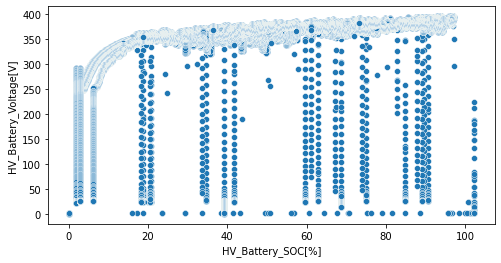

In [22]:
# All tests combined
plt.figure(figsize=(8,4))

sns.scatterplot(x='HV_Battery_SOC[%]', y='HV_Battery_Voltage[V]', palette='hls', data=df_discharging_raw)

plt.show()

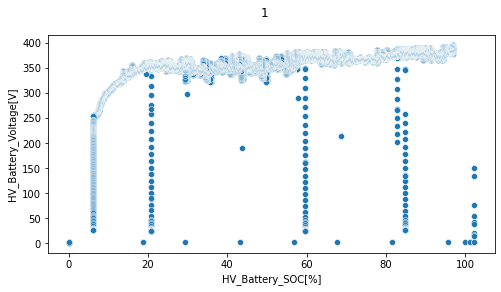

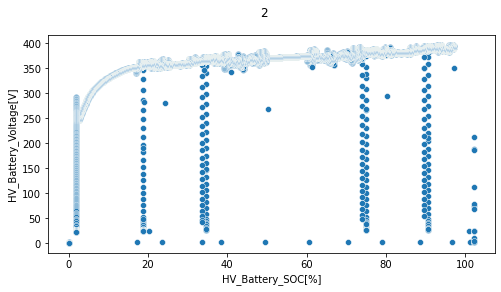

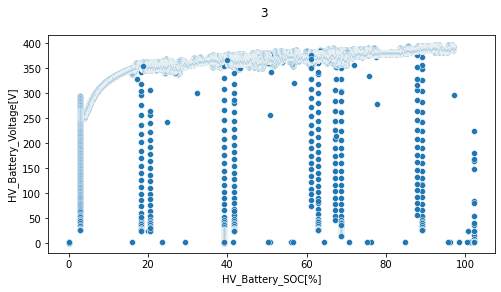

In [23]:
# Each graph represents a charge
charge_ids = df_test_setup_raw['Charge'].unique()

for id_c in charge_ids:
    f = plt.figure(figsize=(8, 4))
    
    test_ids = df_test_setup_raw.loc[df_test_setup_raw['Charge'] == id_c]['Test ID [#]']
    test_data = pd.DataFrame()
    actual_test= pd.DataFrame()
    for id_t in test_ids:
        actual_test = df_discharging_raw[df_discharging_raw['test_id'] == id_t]
        test_data = pd.concat([test_data, actual_test])
    sns.scatterplot(x='HV_Battery_SOC[%]', y='HV_Battery_Voltage[V]', palette='hls', data=test_data)
    f.suptitle(f"{id_c}")

C:\Users\muril\AppData\Local\Temp\ipykernel_4520\1375548559.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, ax = plt.subplots(figsize=(8, 4))


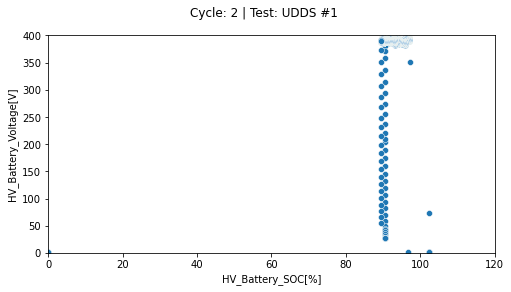

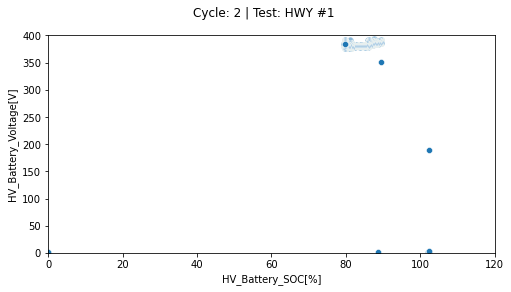

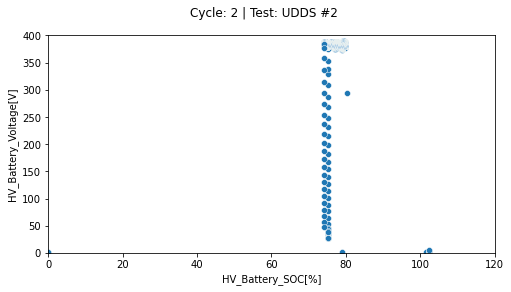

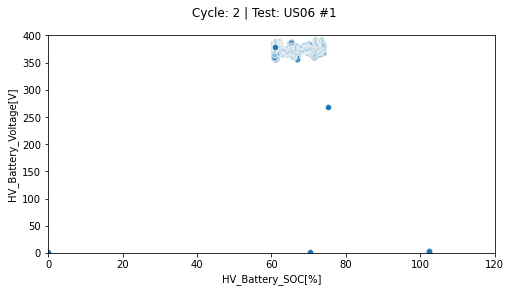

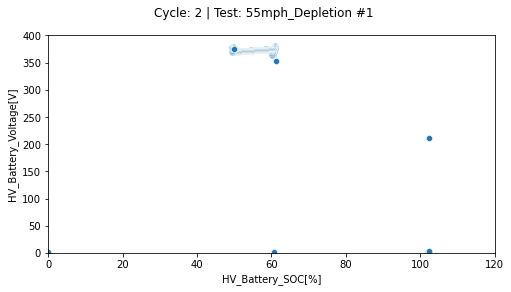

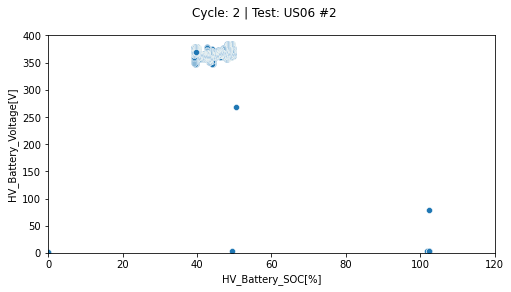

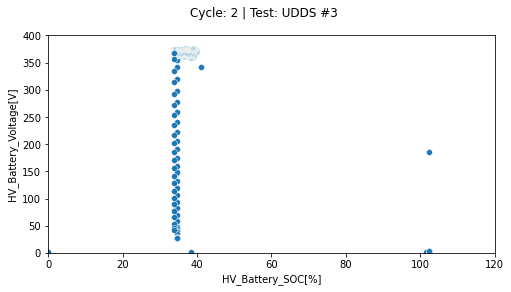

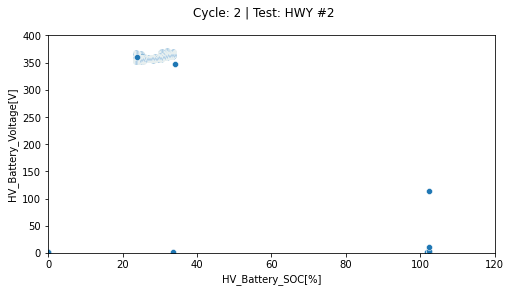

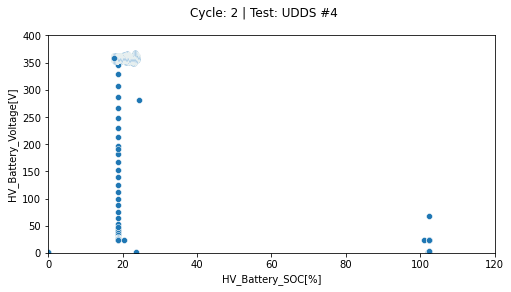

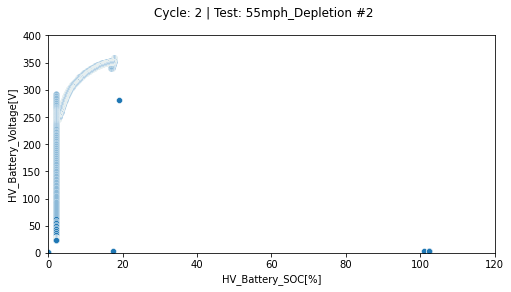

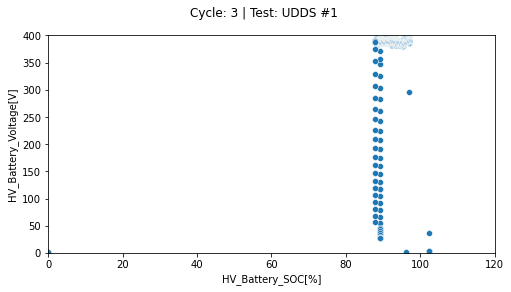

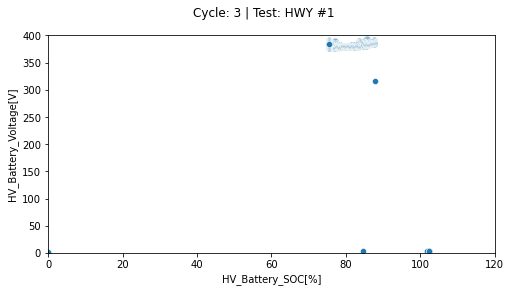

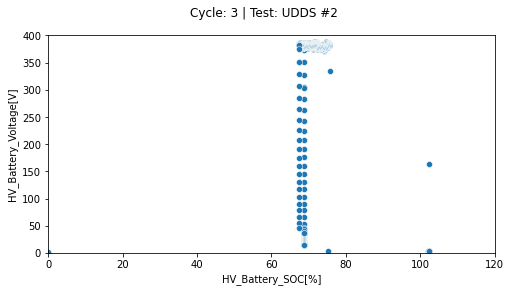

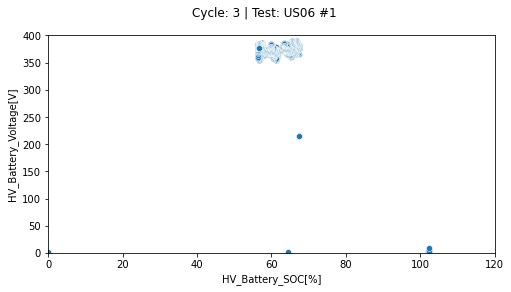

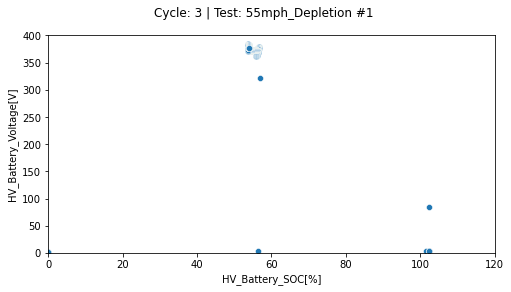

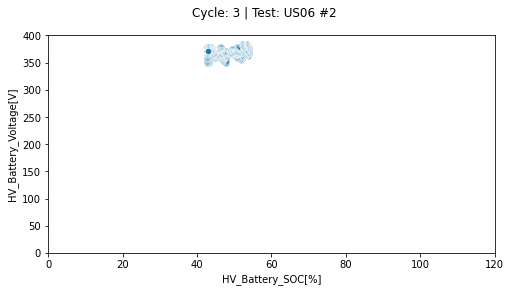

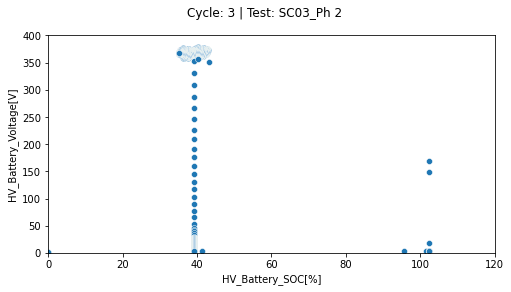

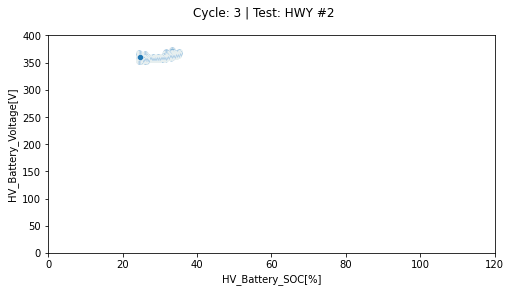

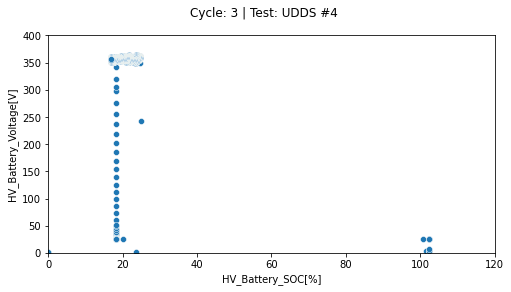

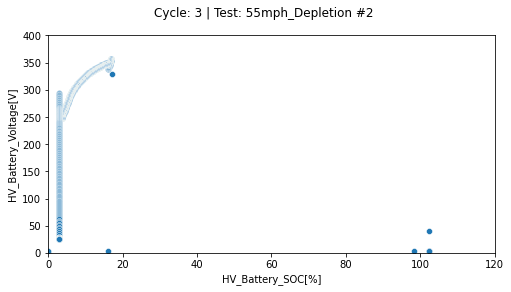

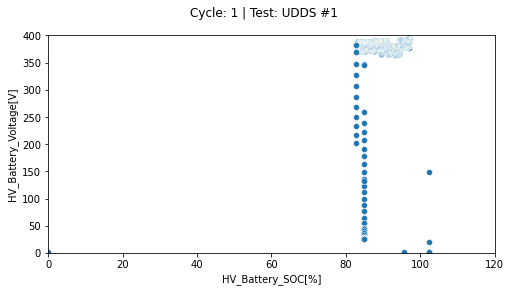

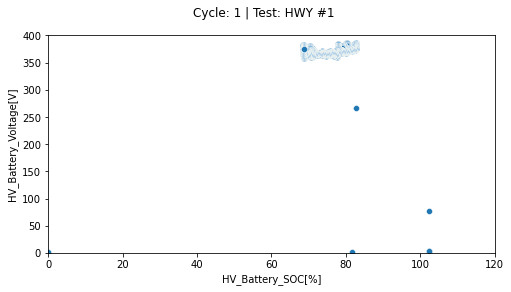

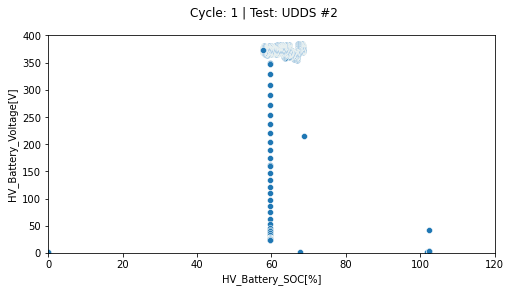

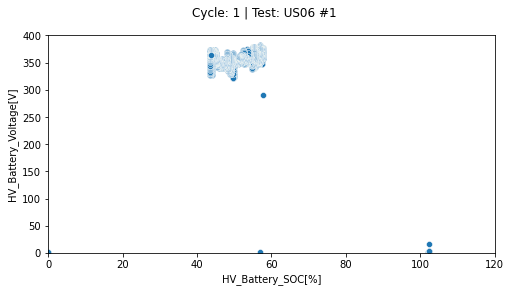

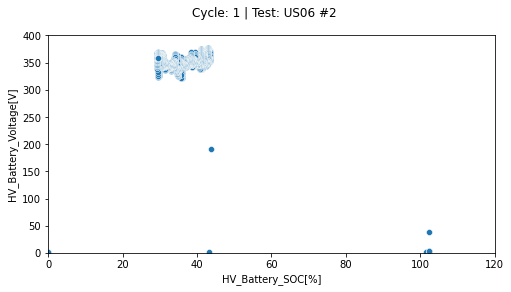

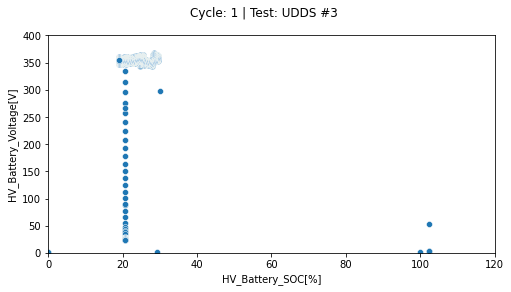

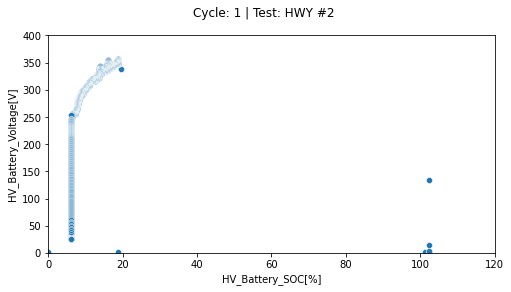

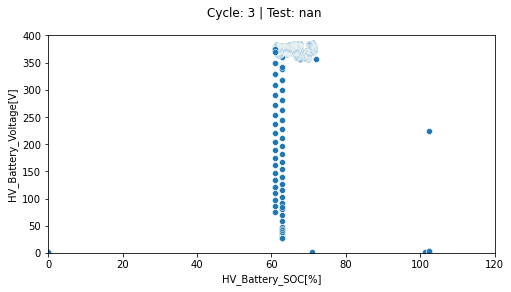

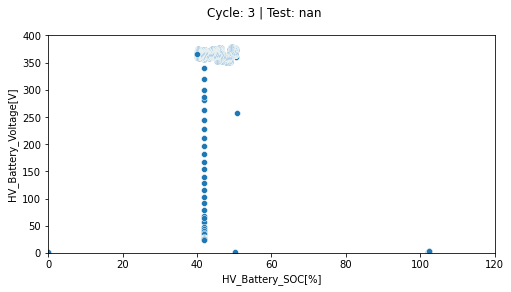

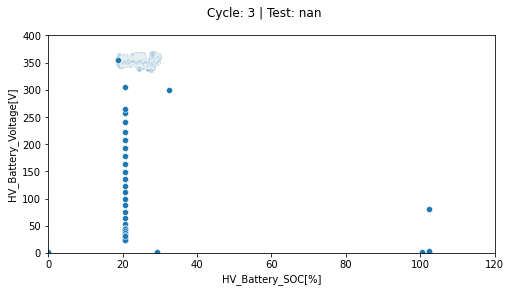

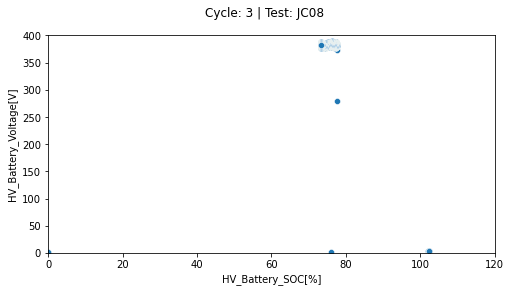

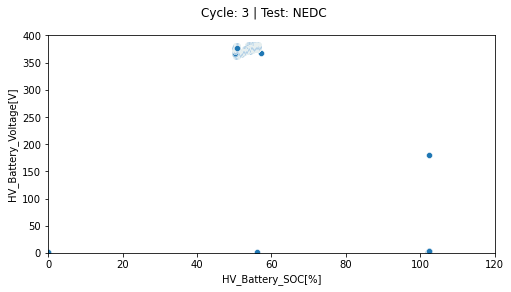

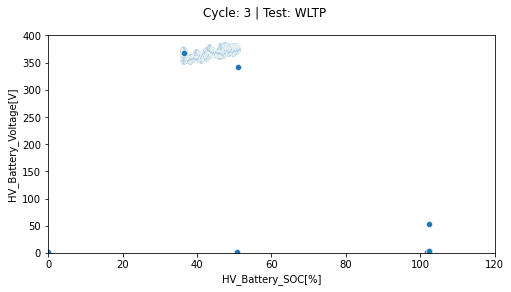

In [24]:
# Each test in each charge
test_ids = df_discharging_raw['test_id'].unique()

for id in test_ids:
    f, ax = plt.subplots(figsize=(8, 4))
    try:
        test_data = df_discharging_raw.loc[df_discharging_raw['test_id'] == id]
        test_id = df_test_setup_raw.loc[df_test_setup_raw['Test ID [#]'] == str(id)]['Cycle']
        charge_id = df_test_setup_raw.loc[df_test_setup_raw['Test ID [#]'] == str(id)]['Charge']
        sns.scatterplot(x='HV_Battery_SOC[%]', y='HV_Battery_Voltage[V]', palette='hls', data=test_data, ax=ax)
        ax.set_xlim(0, 120)
        ax.set_ylim(0, 400)

        f.suptitle(f"Cycle: {charge_id.item()} | Test: {test_id.item()}")
    except:
        print(id)

C:\Users\muril\AppData\Local\Temp\ipykernel_4520\777355507.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(8, 4))


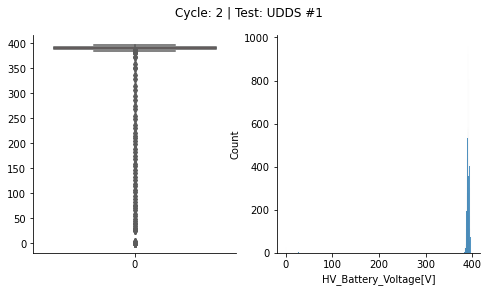

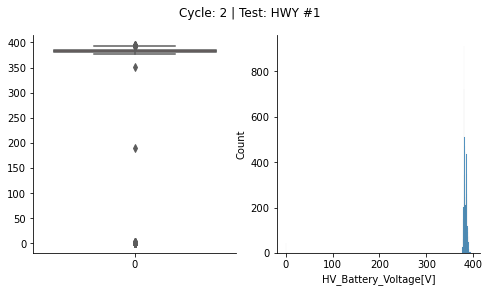

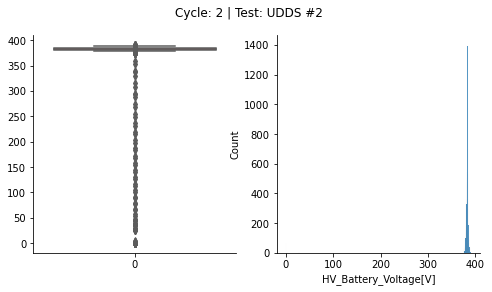

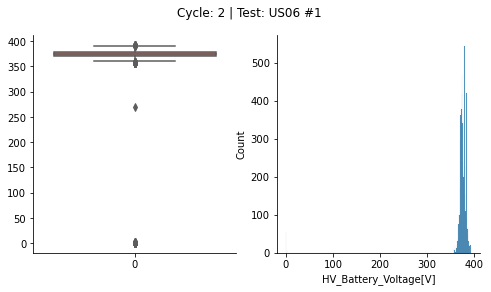

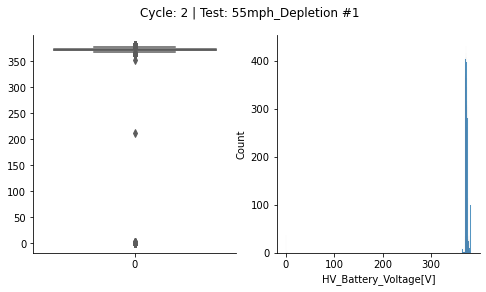

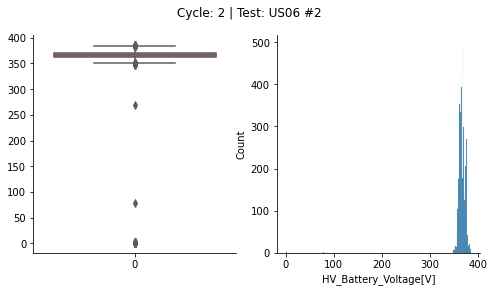

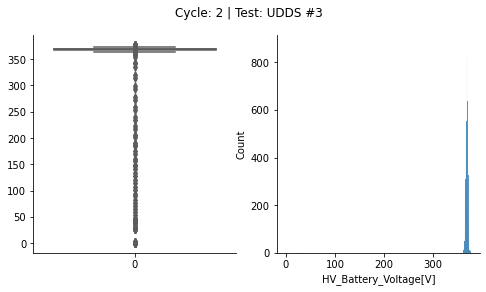

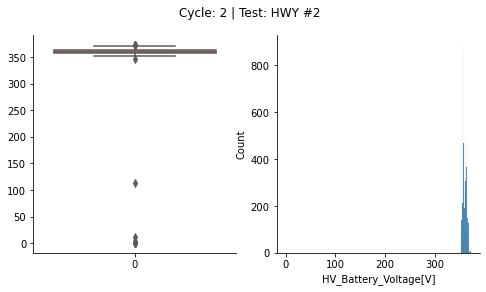

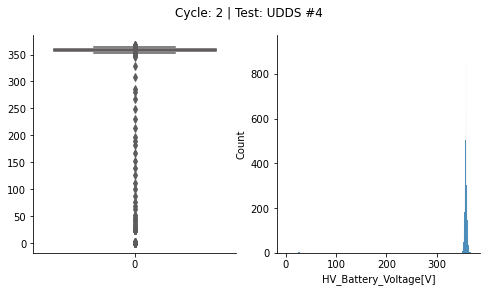

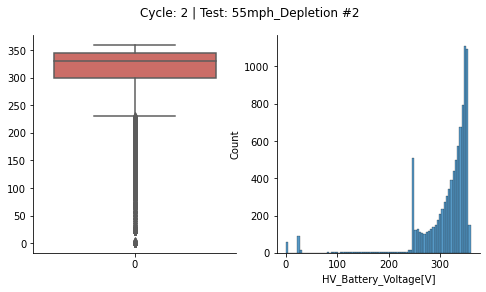

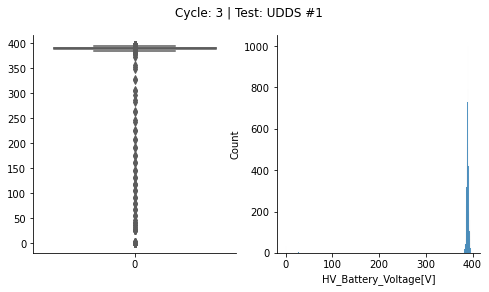

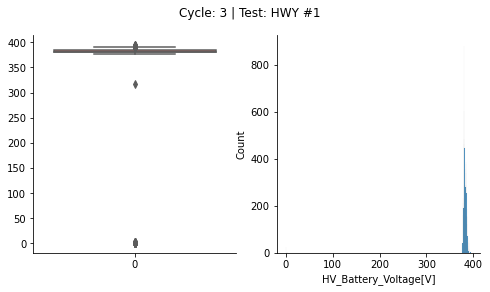

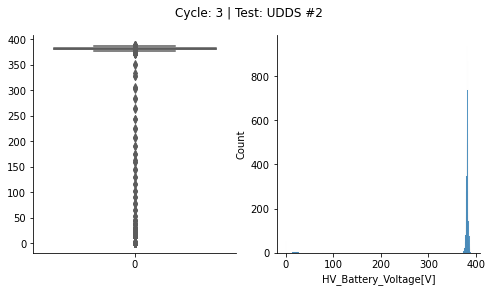

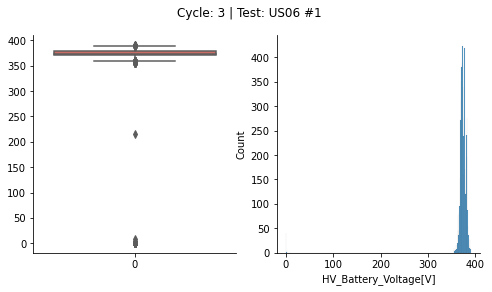

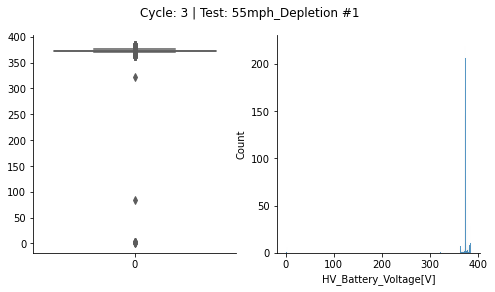

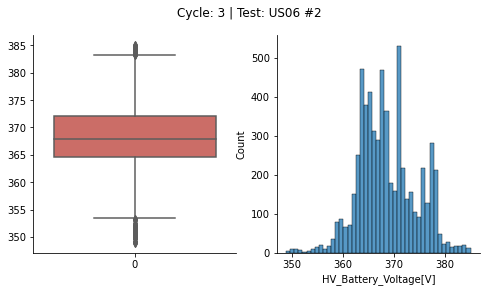

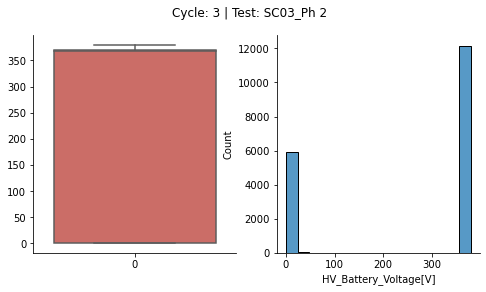

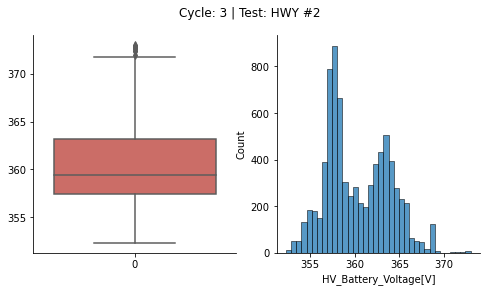

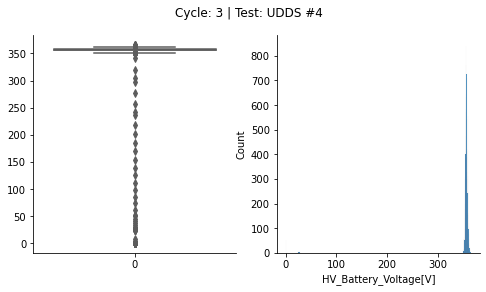

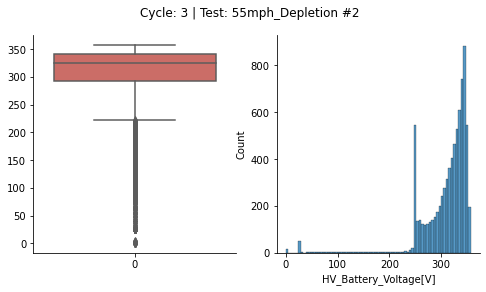

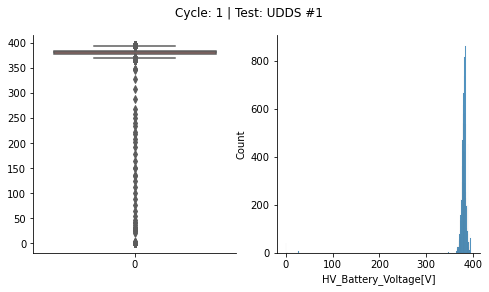

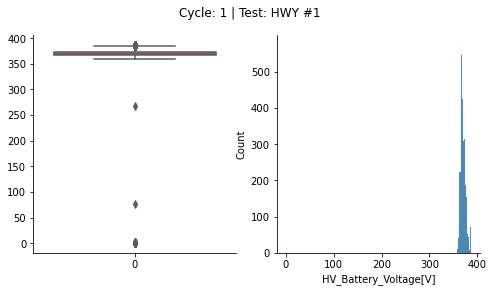

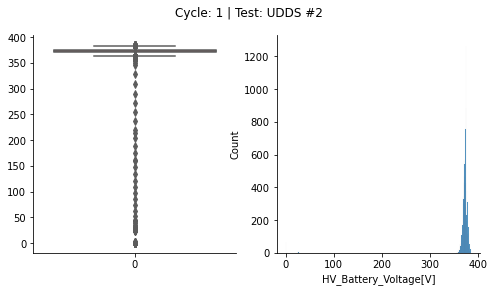

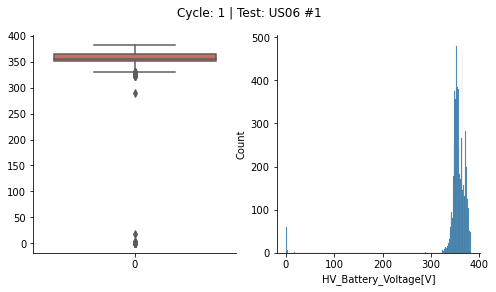

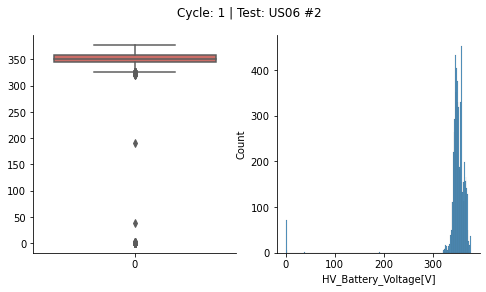

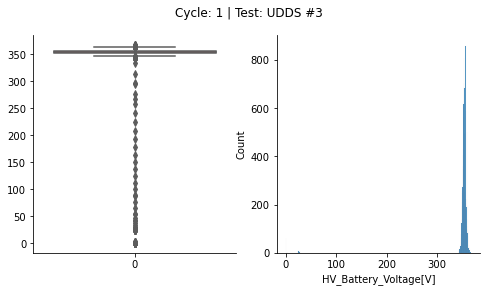

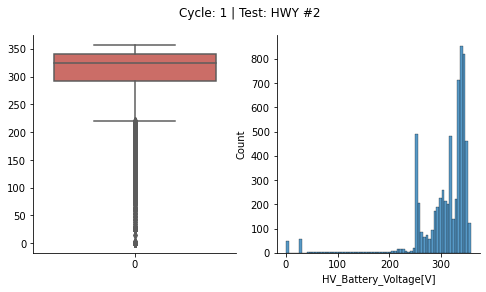

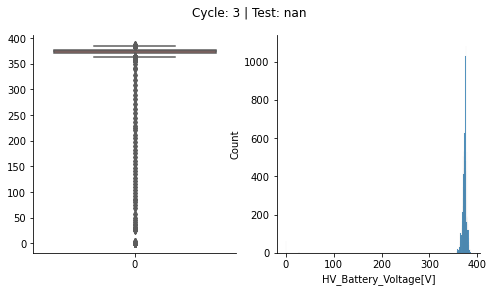

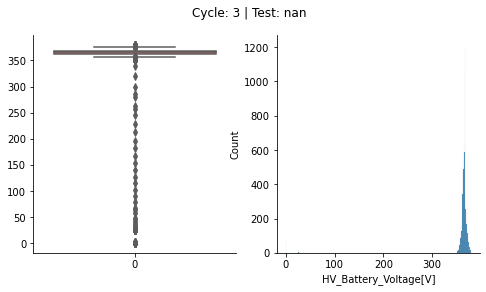

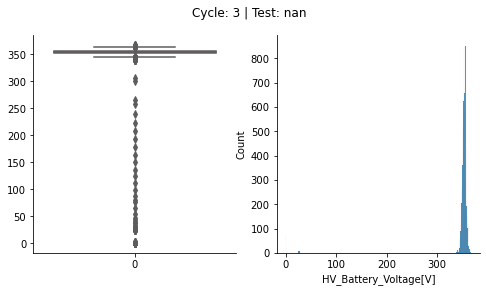

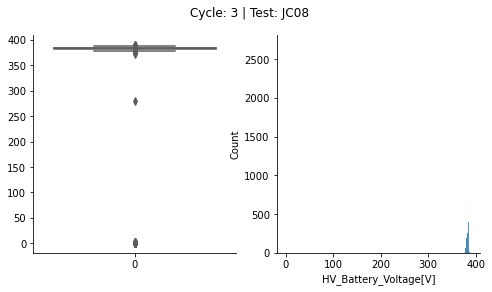

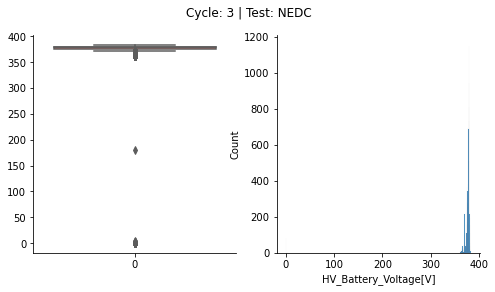

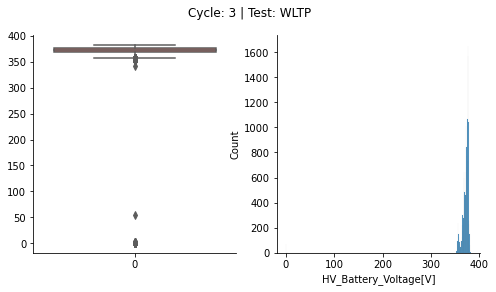

In [25]:
test_ids = df_discharging_raw['test_id'].unique()

for id in test_ids:
    f = plt.figure(figsize=(8, 4))
    ax1 = f.add_subplot(1, 2, 1)
    ax2 = f.add_subplot(1, 2, 2)
    test_data = df_discharging_raw.loc[df_discharging_raw['test_id'] == id]
    test_id = df_test_setup_raw.loc[df_test_setup_raw['Test ID [#]'] == id]['Cycle']
    charge_id = df_test_setup_raw.loc[df_test_setup_raw['Test ID [#]'] == id]['Charge']
    voltage_test_data = test_data['HV_Battery_Voltage[V]']
    sns.boxplot(data=voltage_test_data, palette='hls',ax=ax1)
    sns.histplot(data=voltage_test_data, palette='hls', ax=ax2)
    f.suptitle(f"Cycle: {charge_id.item()} | Test: {test_id.item()}")
    sns.despine(top=True, right=True)

### Checking outliers
There is a lot of noise in the data, specially on the beggining of a test cycle.
This section provides a way of dealing with this noise.

One hypothesis of the noise, is that on the start of the test the measurements aren't realy precise due to the unstable behavior of the components. So, I'll analyse the start and the end of each test cycle to verify if there is a match between the state of charge measured on the end of a test and the start of the following one. 

In [26]:
df_grouped = df_discharging_merged.groupby('test_id')
df_frst_last = pd.DataFrame()

# Iterate over each group and print the first and last rows
for name, test in df_grouped:
    frst = test.head(60)
    last = test.tail(40)

    df_frst_last = pd.concat([df_frst_last, frst, last])
df_frst_last[['test_id', 'Time[sec]','HV_Battery_SOC[%]']]

,test_id,Time[sec],HV_Battery_SOC[%]
0,61403011,-10.000,0.0
1,61403011,-9.900,0.0
2,61403011,-9.800,0.0
3,61403011,-9.700,0.0
4,61403011,-9.600,0.0
...,...,...,...
349140,61403103,1802.598,36.5
349141,61403103,1802.698,36.5
349142,61403103,1802.798,36.5
349143,61403103,1802.898,36.5


There is a mismatch between state of charge measured in the end of a test and the SoC measured on the start of the following one.

The next code cells will manipulate and correct this mismatch.

In [27]:
def drop_intial_charge_noise(df):
    """
    Locate the intial measurements.
    """
    df = df.loc[(df['HV_Battery_SOC[%]'] < 100)]
    df_grouped = df.groupby(['HV_Battery_SOC[%]'])
    highest_soc = 0
    for ids, data in df_grouped:
        if len(data) > 40 and ids > highest_soc:
            start_test_index = data.index.max()
            highest_soc = ids
    return start_test_index

def drop_soc_noise(df):
    """
    The last SoC of a test, is the intial SoC of the following test. 
    So It iterates over the dataframe, getting the last SoC measured in each test.
    Which is used to find the row where the next test measurements starts.
    
    Also, it eliminates:
    - SoC bigger than 100%
    
    """
    df = df.loc[(df['HV_Battery_SOC[%]'] < 100)]
    df['delta_SOC'] = df['HV_Battery_SOC[%]'].diff()
    df_grouped = df.groupby(['Charge','test_id'])
    df_cleaned = pd.DataFrame()
    
    last_SOC_measured = df['HV_Battery_SOC[%]'].head(1)
    last_SOC_measured = last_SOC_measured.values[0]
    
    past_charge = 0
    for ids, test_data in df_grouped:
        if past_charge != ids[0]: # it means that it's the start of a new test on a new charge
            start_SOC_index = drop_intial_charge_noise(test_data)
            past_charge = ids[0]
        else:
            start_SOC_index = df.loc[df['HV_Battery_SOC[%]'] == last_SOC_measured].index.min()
            
        last_SOC_measured = test_data['HV_Battery_SOC[%]'].tail(1).values[0]
        
        result_df = test_data.loc[start_SOC_index:]
        df_cleaned = pd.concat([df_cleaned, result_df])
    return df_cleaned


def drop_voltage_noise(df):
    df = df.loc[df['HV_Battery_Voltage[V]'] != 0]
    df['delta_voltage'] = df['HV_Battery_Voltage[V]'].diff(-1)
    df = df.loc[df['delta_voltage'] > -10]
    df = df.loc[df['delta_voltage'] < 10]
    return df

In [28]:
df_filtered = (df_discharging_merged.pipe(drop_soc_noise)
                                    .pipe(drop_voltage_noise))
df_filtered.head()

C:\Users\muril\AppData\Local\Temp\ipykernel_4520\497574486.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['delta_SOC'] = df['HV_Battery_SOC[%]'].diff()


,Time[sec],Dyno_Speed[mph],Dyno_Tractive_Effort[N],Test_Cell_Temp[C],Test_Cell_RH[%],Phase_#,HV_Battery_Current[A],HV_Battery_Voltage[V],HV_Battery_SOC[%],Accelerator_Pedal_Position[%],...,Cycle HV battery Integrated net current [DC Ah],Cycle HV battery Average Zero crossing Voltage [V],Cycle HV battery Net Energy [DC Wh],Cycle HV battery Net Energy Consumption[DC Wh/mi],Cycle,Order,Charge,acumulated_time[sec],delta_SOC,delta_voltage
197334,9.9,0.010,-12.351,-6.782,7.017,1.0,5.930,393.832,96.900,0.0,...,6.428,383.3,2911.7,390.5,UDDS #1,1,1,9.9,0.000,0.219
197335,10.0,0.008,-12.392,-6.782,7.016,1.0,6.190,393.613,96.802,0.0,...,6.428,383.3,2911.7,390.5,UDDS #1,1,1,10.0,-0.098,-0.193
197336,10.1,0.008,-12.325,-6.781,7.016,1.0,6.454,393.806,96.800,0.0,...,6.428,383.3,2911.7,390.5,UDDS #1,1,1,10.1,-0.002,0.097
197337,10.2,0.008,-12.244,-6.781,7.015,1.0,6.558,393.709,96.800,0.0,...,6.428,383.3,2911.7,390.5,UDDS #1,1,1,10.2,0.000,0.211
197338,10.3,0.009,-12.228,-6.782,7.016,1.0,6.810,393.498,96.800,0.0,...,6.428,383.3,2911.7,390.5,UDDS #1,1,1,10.3,0.000,-0.212


In [29]:
print(df_filtered.shape)
print(df_discharging_merged.shape)
print(df_discharging_merged.shape[0] - df_filtered.shape[0])

(347690, 35)
(349145, 33)
1455


C:\Users\muril\AppData\Local\Temp\ipykernel_4520\2076817105.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(10, 4))


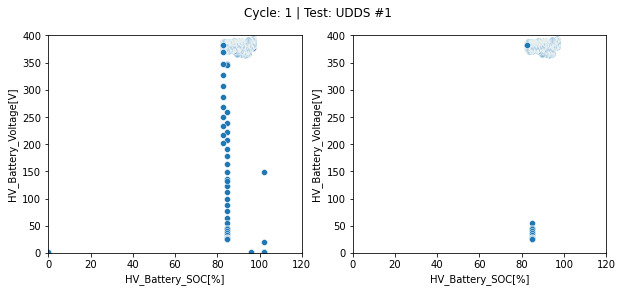

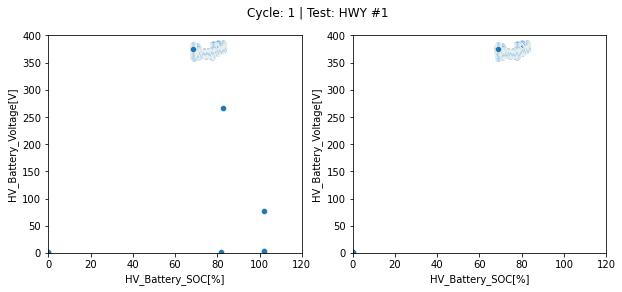

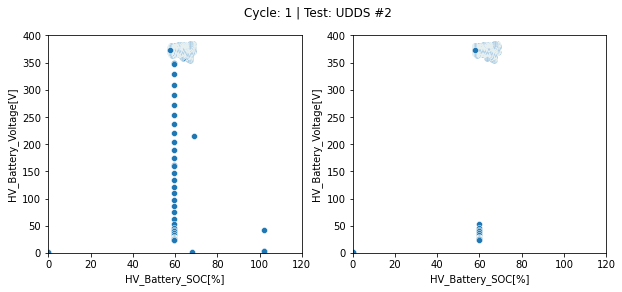

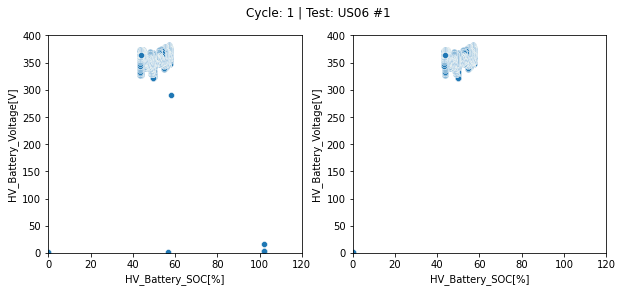

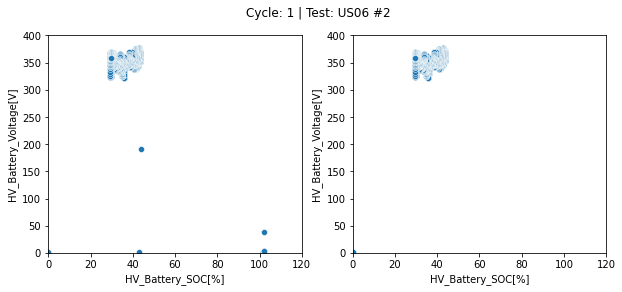

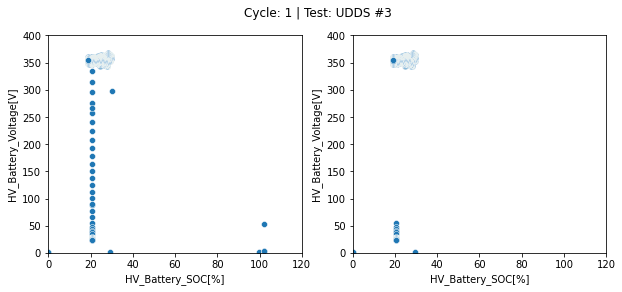

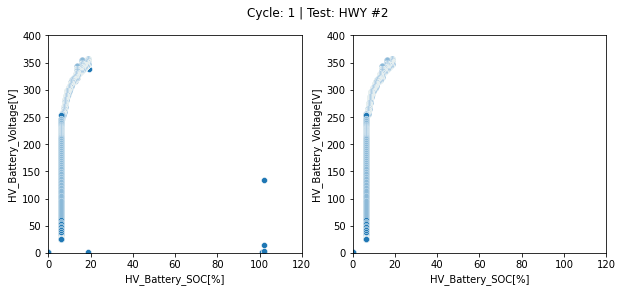

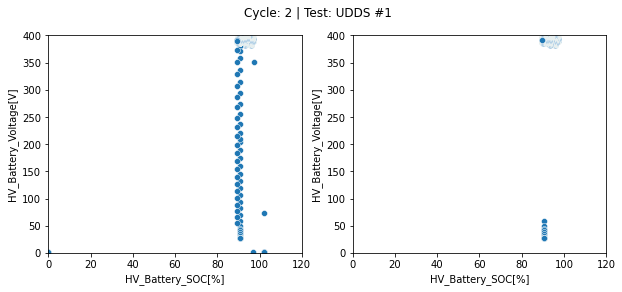

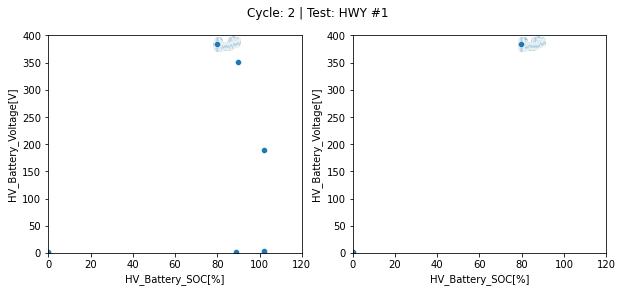

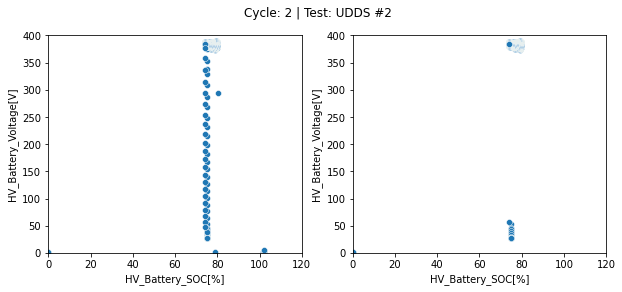

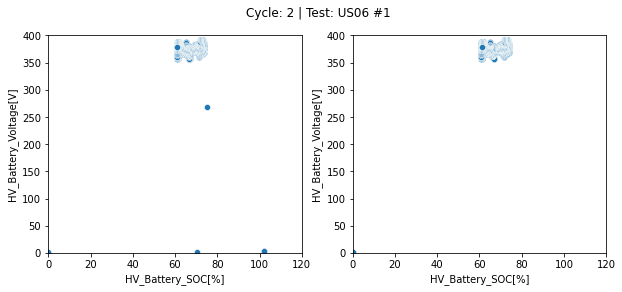

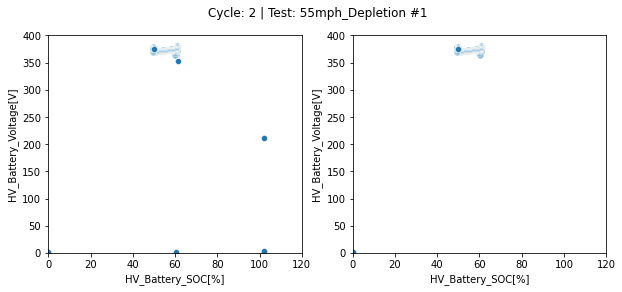

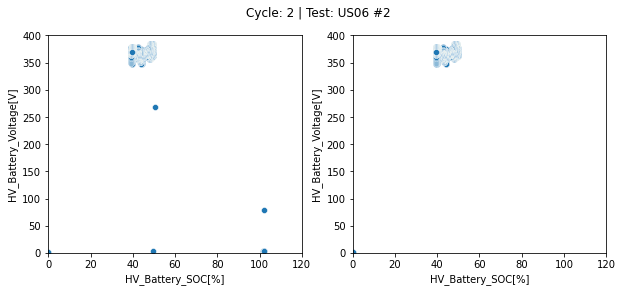

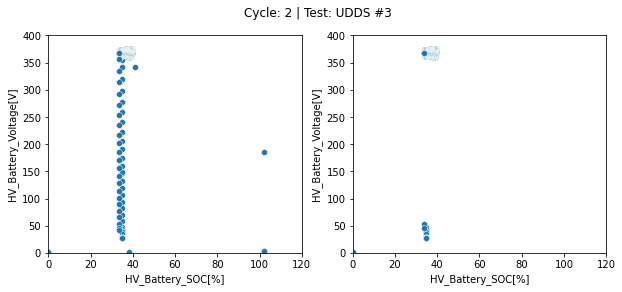

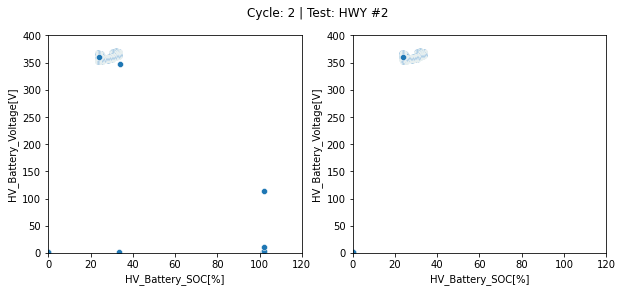

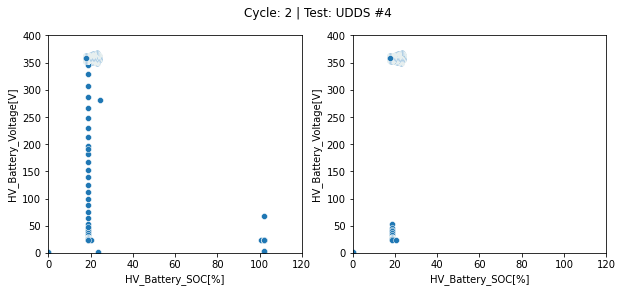

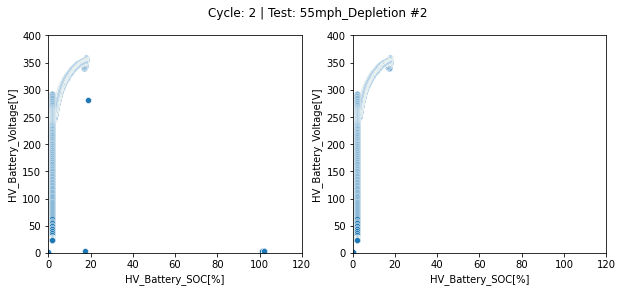

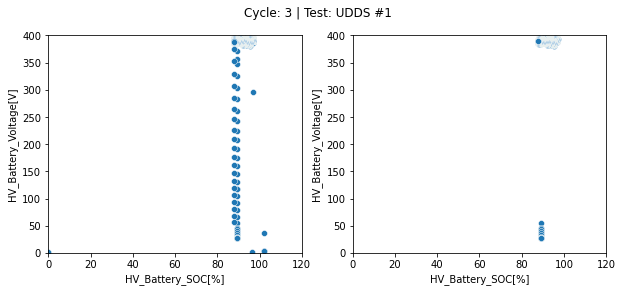

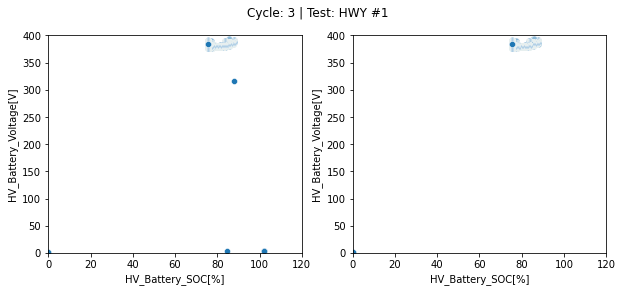

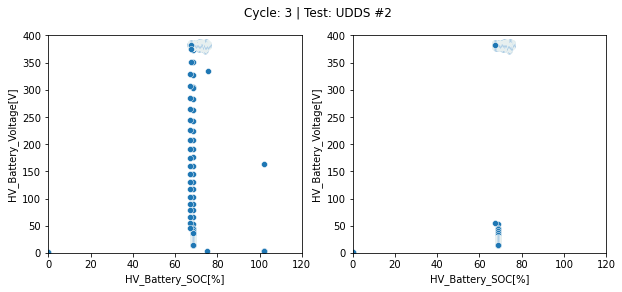

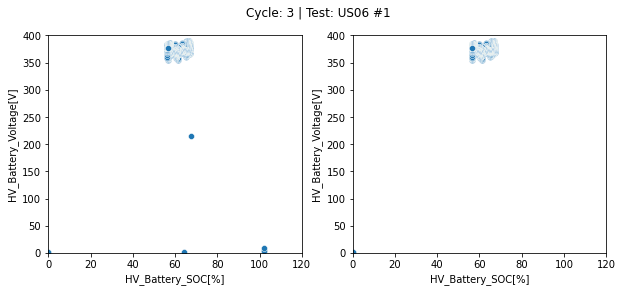

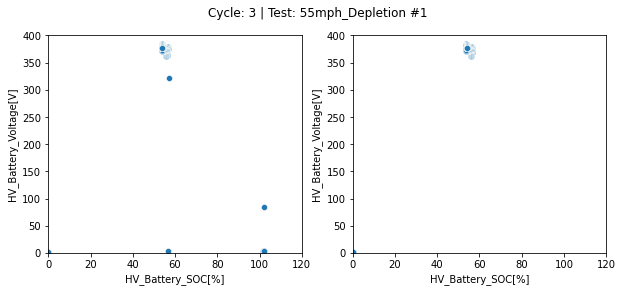

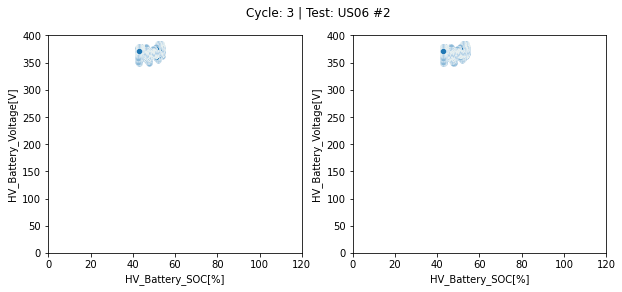

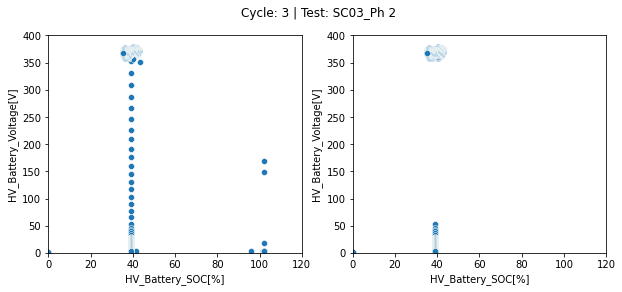

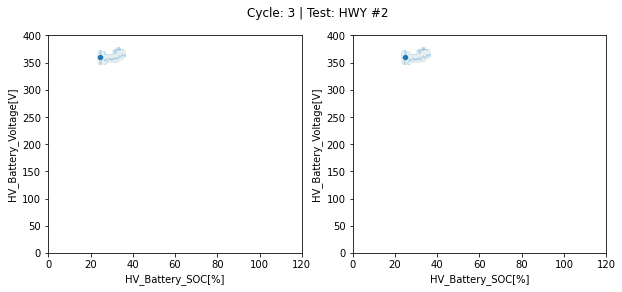

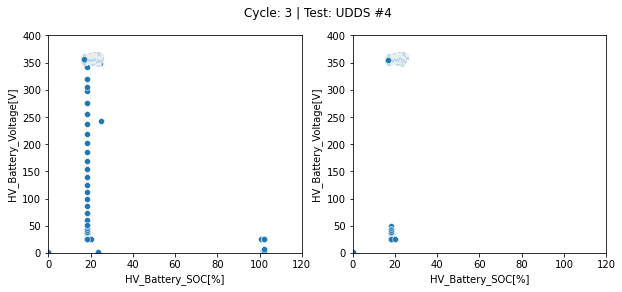

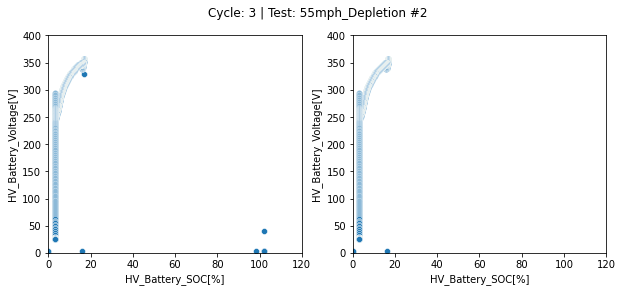

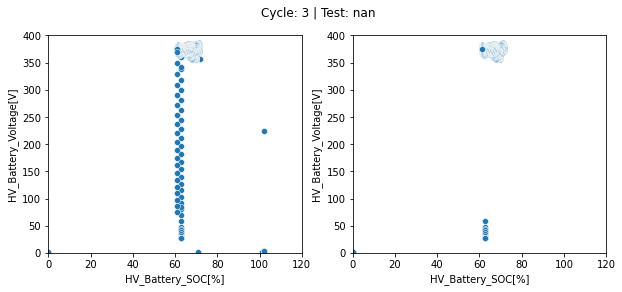

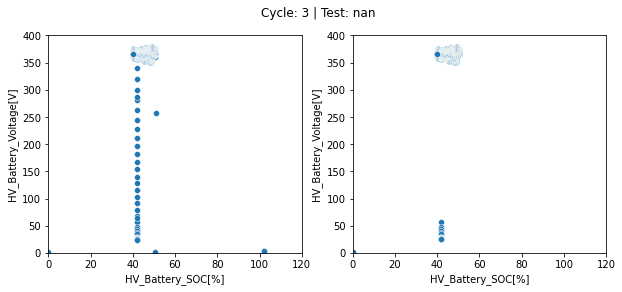

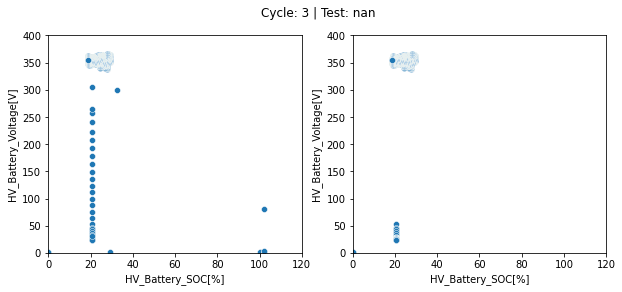

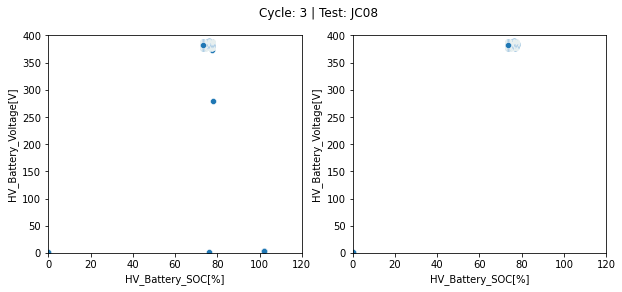

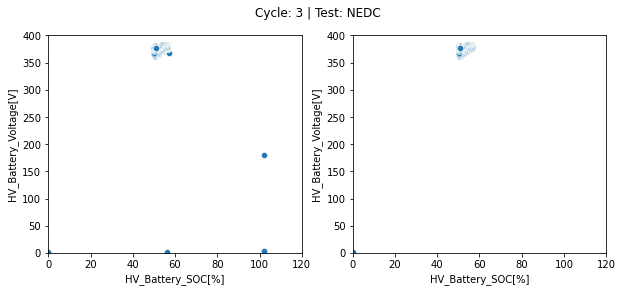

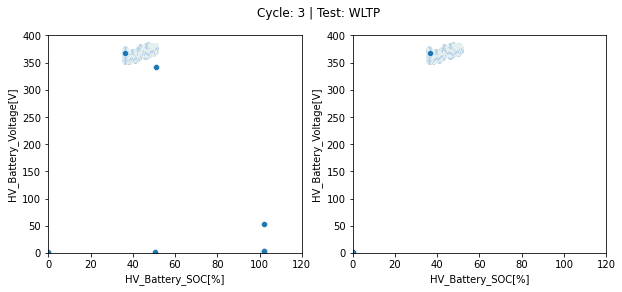

In [30]:
# Left past measurements | Right clean data
test_ids = df_filtered['test_id'].unique()

for id in test_ids:
    f = plt.figure(figsize=(10, 4))
    ax1 = f.add_subplot(1, 2, 1)
    test_data_raw = df_discharging_raw.loc[df_discharging_raw['test_id'] == id]
    sns.scatterplot(x='HV_Battery_SOC[%]', y='HV_Battery_Voltage[V]', palette='hls', data=test_data_raw, ax=ax1)
    ax1.set_xlim(0, 120)
    ax1.set_ylim(0, 400)
    
    ax2 = f.add_subplot(1, 2, 2)
    test_data = df_filtered.loc[df_filtered['test_id'] == id]
    sns.scatterplot(x='HV_Battery_SOC[%]', y='HV_Battery_Voltage[V]', palette='hls', data=test_data, ax=ax2)
    ax2.set_xlim(0, 120)
    ax2.set_ylim(0, 400)
    
    test_id = df_test_setup_raw.loc[df_test_setup_raw['Test ID [#]'] == id]['Cycle']
    charge_id = df_test_setup_raw.loc[df_test_setup_raw['Test ID [#]'] == id]['Charge']
    f.suptitle(f"Cycle: {charge_id.item()} | Test: {test_id.item()}")

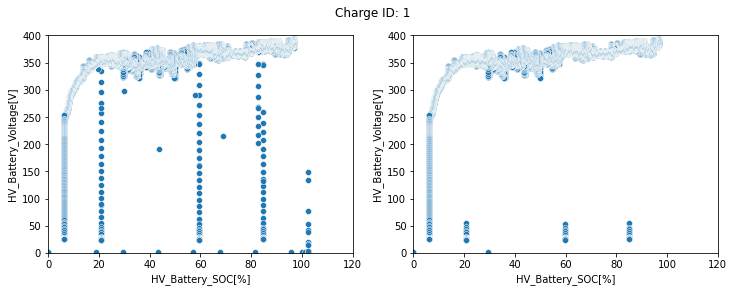

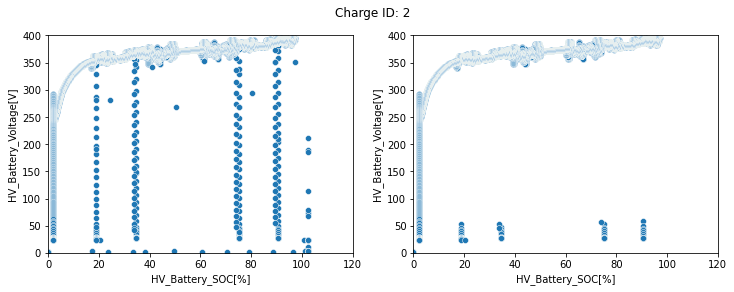

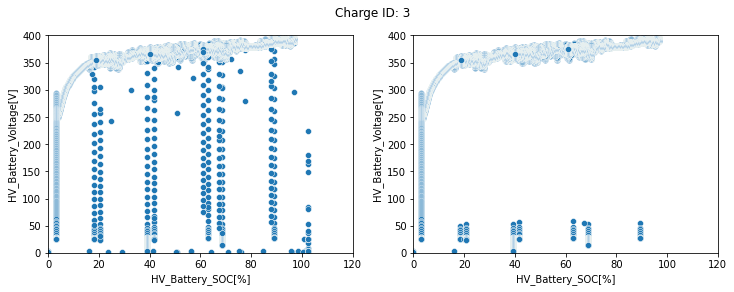

In [31]:
charge_ids = df_test_setup_raw['Charge'].unique()
for id_c in charge_ids:
    f = plt.figure(figsize=(12, 4))
    ax1 = f.add_subplot(1, 2, 1)
    ax2 = f.add_subplot(1, 2, 2)
    
    filtered_test = pd.DataFrame()
    actual_test= pd.DataFrame()
    original_test = pd.DataFrame()
    
    test_ids = df_test_setup_raw.loc[df_test_setup_raw['Charge'] == id_c]['Test ID [#]']
    for id_t in test_ids:
        actual_filtered_test = df_filtered[df_filtered['test_id'] == id_t]
        filtered_test = pd.concat([filtered_test, actual_filtered_test])
        
        actual_original_test = df_discharging_raw[df_discharging_raw['test_id'] == id_t]
        original_test = pd.concat([original_test, actual_original_test])
        
    sns.scatterplot(x='HV_Battery_SOC[%]', y='HV_Battery_Voltage[V]', palette='hls', data=original_test, ax=ax1)
    ax1.set_xlim(0, 120)
    ax1.set_ylim(0, 400)
    
    sns.scatterplot(x='HV_Battery_SOC[%]', y='HV_Battery_Voltage[V]', palette='hls', data=filtered_test, ax=ax2)
    ax2.set_xlim(0, 120)
    ax2.set_ylim(0, 400)
    
    f.suptitle(f"Charge ID: {id_c}")

## 3.2 Model viz

In [32]:
df_model_1 = calculate_voltage_model_v1(df_filtered)
df_model_2 = calculate_voltage_model_v2(df_filtered)

C:\Users\muril\conda\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [33]:
print("Erro médio modelo 1:" , df_model_1['voltage_error_modelv1'].mean())
print("Erro médio modelo 2:" ,df_model_2['voltage_error_modelv2'].mean())

Erro médio modelo 1: 61.27363645482343
Erro médio modelo 2: 456.6543398011554


In [34]:
df_model_2 = calculate_voltage_model_v1(df)

charge_ids = df_test_setup_raw['Charge'].unique()

for id_c in charge_ids:
    f = plt.figure(figsize=(8, 4))
    
    test_ids = df_model_2.loc[df_model_2['Charge'] == id_c]['Test ID [#]']
    test_data = pd.DataFrame()
    actual_test= pd.DataFrame()
    for id_t in test_ids:
        actual_test = df_model_2[df_model_2['test_id'] == id_t]
        test_data = pd.concat([test_data, actual_test])
    sns.scatterplot(x='acumulated_time[sec]', y='HV_Battery_Voltage[V]', palette='hls', data=test_data)
    f.suptitle(f"{id_c}")

C:\Users\muril\conda\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\muril\conda\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


KeyboardInterrupt: 

<Figure size 576x288 with 0 Axes>